In [1]:
#importing the libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Adesewa\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_USA = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

df_USA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [3]:
job_titles = df_USA['job_title_short'].value_counts().index[:6].to_list()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_USA_top6 = df_USA[df_USA['job_title_short'].isin(job_titles)]

In [5]:
job_order =(df_USA_top6.groupby('job_title_short')['salary_year_avg']
            .median().sort_values(ascending=False).index)

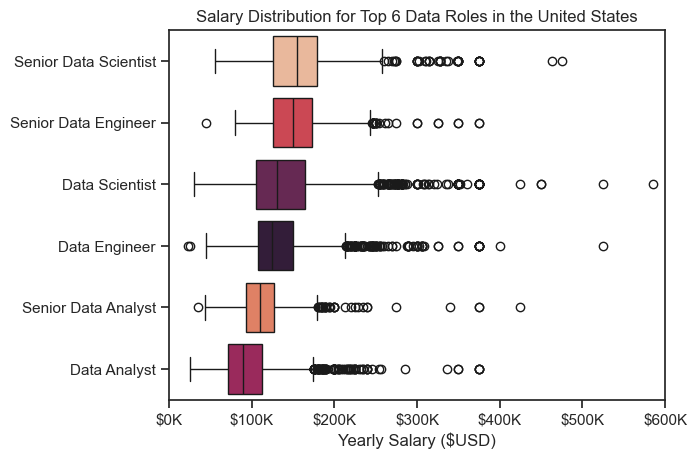

In [14]:
sns.boxplot(data = df_USA_top6, x = 'salary_year_avg', y = 'job_title_short',
            hue = 'job_title_short', palette= 'rocket', order = job_order)


plt.title('Salary Distribution for Top 6 Data Roles in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()

Investigate Median Salary VS Skills for Data Scientists

In [7]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & 
              (df['job_country'] == 'United States')]

df_DS_US = df_DS_US.dropna(subset = ['salary_year_avg'])

In [8]:
df_DS_US = df_DS_US.explode('job_skills')

In [10]:
df_DS_top_pay = (df_DS_US.groupby('job_skills')['salary_year_avg']
                 .agg(['count', 'median'])
                 .sort_values(by = 'median', ascending = False))

df_DS_top_pay = df_DS_top_pay.head(5)

df_DS_top_pay

,count,median
job_skills,,
asana,5,259000.0
airtable,6,224250.0
watson,10,213500.0
unreal,4,211500.0
ruby on rails,4,195500.0


In [11]:
df_DS_top_skills = (df_DS_US.groupby('job_skills')['salary_year_avg']
                    .agg(['count', 'median'])
                    .sort_values(by = 'count', ascending = False))

df_DS_top_skills = df_DS_top_skills.head(5).sort_values(by = 'median')

df_DS_top_skills

,count,median
job_skills,,
sas,1022,120000.0
tableau,989,125000.0
r,2053,126000.0
python,3358,131867.0
sql,2463,134500.0


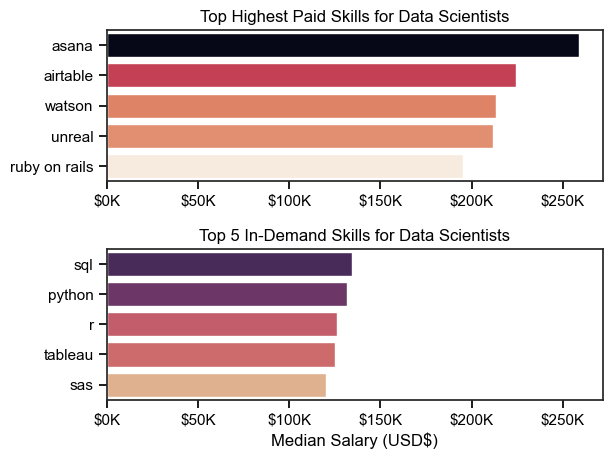

In [13]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

sns.barplot(data = df_DS_top_pay, x = 'median', y = df_DS_top_pay.index, 
            ax = ax[0], hue='median', palette = 'rocket_r')
ax[0].set_title('Top Highest Paid Skills for Data Scientists', color = 'black')
ax[0].legend().remove()
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data = df_DS_top_skills, x = 'median', y = df_DS_top_skills.index, 
            ax = ax[1], hue = 'median', palette = 'flare')
ax[1].set_title('Top 5 In-Demand Skills for Data Scientists', color = 'black')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD$)', color = 'black')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()
ax[1].invert_yaxis()

for ax in ax:
    ax.tick_params(axis='y', colors='black'),
    ax.tick_params(axis='x', colors='black')

#fig.tight_layout()
plt.subplots_adjust(hspace=0.45) 

